In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
dfg = pd.read_csv('wat-r13-good.csv')
dfm = pd.read_csv('wat-r13-mals.csv')

In [6]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,133,0,3,0xeae00,1,0,3,2,8,24,8,29,13,121,1,29,34,7,7,1
1,172,4,0,0xeae00,2,0,3,2,8,29,13,24,8,168,1,28,34,6,7,1
2,173,4,0,0xeae00,3,0,0,4,16,29,13,0,0,168,1,27,34,5,7,1
3,174,4,0,0xeae00,3,1,1,4,16,29,13,0,0,168,1,26,34,4,7,1
4,175,4,0,0xeae00,3,2,1,4,16,29,13,0,0,168,1,25,34,3,7,1


In [7]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,19,0,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,53,59,8,8,0
1,27,2,0,0xecf40,1,0,3,2,8,29,13,30,14,23,1,50,59,7,8,0
2,74,0,2,0xecf40,2,0,3,2,8,30,14,29,13,66,1,40,59,6,8,0
3,75,3,2,0xecf40,3,0,0,4,16,30,14,1,1,66,1,39,59,5,8,0
4,76,3,2,0xecf40,3,1,1,4,16,30,14,1,1,66,1,38,59,4,8,0


In [8]:
df = dfg.append(dfm, ignore_index=True)

In [9]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,133,0,3,0xeae00,1,0,3,2,8,24,8,29,13,121,1,29,34,7,7,1
1,172,4,0,0xeae00,2,0,3,2,8,29,13,24,8,168,1,28,34,6,7,1
2,173,4,0,0xeae00,3,0,0,4,16,29,13,0,0,168,1,27,34,5,7,1
3,174,4,0,0xeae00,3,1,1,4,16,29,13,0,0,168,1,26,34,4,7,1
4,175,4,0,0xeae00,3,2,1,4,16,29,13,0,0,168,1,25,34,3,7,1


In [10]:
df = df.sort_values('time')

In [11]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
26854,19,0,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,53,59,8,8,0
26855,27,2,0,0xecf40,1,0,3,2,8,29,13,30,14,23,1,50,59,7,8,0
26856,74,0,2,0xecf40,2,0,3,2,8,30,14,29,13,66,1,40,59,6,8,0
26857,75,3,2,0xecf40,3,0,0,4,16,30,14,1,1,66,1,39,59,5,8,0
26858,76,3,2,0xecf40,3,1,1,4,16,30,14,1,1,66,1,38,59,4,8,0
26859,77,3,2,0xecf40,3,2,1,4,16,30,14,1,1,66,1,37,59,3,8,0
26860,78,3,2,0xecf40,3,3,1,4,16,30,14,1,1,66,1,36,59,2,8,0
26861,82,3,2,0xecf40,3,4,2,4,16,30,14,1,1,66,1,24,59,1,8,0
26862,133,0,3,0xeae00,1,0,3,2,8,24,8,29,13,121,3,52,63,14,14,0
0,133,0,3,0xeae00,1,0,3,2,8,24,8,29,13,121,1,29,34,7,7,1


In [12]:
df.to_csv('wat-r13-pkt.csv',index=False)

In [13]:
df = pd.read_csv("wat-r13-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,19,0,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,53,59,8,8,0
1,27,2,0,0xecf40,1,0,3,2,8,29,13,30,14,23,1,50,59,7,8,0
2,74,0,2,0xecf40,2,0,3,2,8,30,14,29,13,66,1,40,59,6,8,0
3,75,3,2,0xecf40,3,0,0,4,16,30,14,1,1,66,1,39,59,5,8,0
4,76,3,2,0xecf40,3,1,1,4,16,30,14,1,1,66,1,38,59,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53707,3251499,4,0,0x4d2c0,3,1,1,4,19,29,13,0,0,3251494,10027,1,42,1,1,1
53708,3251500,4,0,0x4d2c0,3,2,1,4,19,29,13,0,0,3251494,10027,27,27,1,1,1
53709,3251501,4,0,0x4d2c0,3,3,1,4,19,29,13,0,0,3251494,10027,26,27,1,1,1
53710,3251502,2,0,0x4d2c0,2,0,3,2,11,29,13,27,11,3251494,10027,25,27,1,1,1


In [14]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,-0.036136,0.038618,0.055631,0.006558,-0.010230,-0.062686,-0.060463,-0.038965,-0.046258,0.062032,0.061326,1.000000,0.982593,-0.103490,-0.149043,-0.468498,-0.566190,0.093098
outport,-0.036136,1.000000,-0.637901,-0.318086,0.059877,-0.093488,0.825132,0.831571,0.532533,0.716121,-0.889237,-0.895433,-0.036127,-0.039550,0.130376,0.001220,-0.038423,0.035406,0.005551
inport,0.038618,-0.637901,1.000000,0.298423,0.008491,-0.013257,-0.513261,-0.621455,-0.349028,-0.457778,0.543905,0.562446,0.038611,0.039827,-0.116487,0.027269,-0.017880,-0.091846,0.008265
packet_type,0.055631,-0.318086,0.298423,1.000000,0.236654,-0.369496,-0.376968,-0.417426,-0.042954,-0.138451,0.273990,0.296063,0.055629,0.058451,-0.044330,0.005196,-0.034650,-0.085322,0.010493
flit_id,0.006558,0.059877,0.008491,0.236654,1.000000,0.050164,0.221332,0.189272,-0.000509,-0.001603,-0.136732,-0.120174,0.006555,0.007032,-0.078752,0.012320,-0.064595,0.009377,0.001828
flit_type,-0.010230,-0.093488,-0.013257,-0.369496,0.050164,1.000000,-0.345573,-0.295518,0.000795,0.002502,0.213485,0.187632,-0.010234,-0.010979,-0.063886,0.029168,-0.003949,0.028659,-0.002854
vnet,-0.062686,0.825132,-0.513261,-0.376968,0.221332,-0.345573,1.000000,0.974335,0.385757,0.526843,-0.935563,-0.928709,-0.062679,-0.064949,0.118744,0.020179,-0.016036,0.065815,-0.006653
vc,-0.060463,0.831571,-0.621455,-0.417426,0.189272,-0.295518,0.974335,1.000000,0.393601,0.531800,-0.913384,-0.909247,-0.060457,-0.062236,0.119905,0.009551,-0.010591,0.075611,-0.007677
src_ni,-0.038965,0.532533,-0.349028,-0.042954,-0.000509,0.000795,0.385757,0.393601,1.000000,0.955135,-0.419745,-0.421094,-0.038959,-0.037408,0.124482,0.126277,-0.008157,0.032198,0.000875
src_router,-0.046258,0.716121,-0.457778,-0.138451,-0.001603,0.002502,0.526843,0.531800,0.955135,1.000000,-0.577040,-0.579236,-0.046252,-0.045981,0.148692,0.132665,-0.009735,0.044032,-0.001225


In [15]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [16]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,0,3,0,0,3,2,8,29,13,3,1,8,8
1,2,0,1,0,3,2,8,30,14,23,1,7,8
2,0,2,2,0,3,2,8,29,13,66,1,6,8
3,3,2,3,0,0,4,16,1,1,66,1,5,8
4,3,2,3,1,1,4,16,1,1,66,1,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53707,4,0,3,1,1,4,19,0,0,3251494,10027,1,1
53708,4,0,3,2,1,4,19,0,0,3251494,10027,1,1
53709,4,0,3,3,1,4,19,0,0,3251494,10027,1,1
53710,2,0,2,0,3,2,11,27,11,3251494,10027,1,1


In [17]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000000,0.000000,0.269231,0.269231
1,0.50,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000006,0.000000,0.230769,0.269231
2,0.00,0.50,0.333333,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000019,0.000000,0.192308,0.269231
3,0.75,0.50,0.500000,0.00,0.000000,1.0,0.727273,0.033333,0.071429,0.000019,0.000000,0.153846,0.269231
4,0.75,0.50,0.500000,0.25,0.333333,1.0,0.727273,0.033333,0.071429,0.000019,0.000000,0.115385,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53707,1.00,0.00,0.500000,0.25,0.333333,1.0,1.000000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
53708,1.00,0.00,0.500000,0.50,0.333333,1.0,1.000000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
53709,1.00,0.00,0.500000,0.75,0.333333,1.0,1.000000,0.000000,0.000000,1.000000,0.973682,0.000000,0.000000
53710,0.50,0.00,0.333333,0.00,1.000000,0.0,0.272727,0.900000,0.785714,1.000000,0.973682,0.000000,0.000000


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.637901,-0.318086,0.059877,-0.093488,0.825132,0.831571,-0.889237,-0.895433,-0.036127,-0.039550,-0.038423,0.035406,0.005551
1,-0.637901,1.000000,0.298423,0.008491,-0.013257,-0.513261,-0.621455,0.543905,0.562446,0.038611,0.039827,-0.017880,-0.091846,0.008265
2,-0.318086,0.298423,1.000000,0.236654,-0.369496,-0.376968,-0.417426,0.273990,0.296063,0.055629,0.058451,-0.034650,-0.085322,0.010493
3,0.059877,0.008491,0.236654,1.000000,0.050164,0.221332,0.189272,-0.136732,-0.120174,0.006555,0.007032,-0.064595,0.009377,0.001828
4,-0.093488,-0.013257,-0.369496,0.050164,1.000000,-0.345573,-0.295518,0.213485,0.187632,-0.010234,-0.010979,-0.003949,0.028659,-0.002854
5,0.825132,-0.513261,-0.376968,0.221332,-0.345573,1.000000,0.974335,-0.935563,-0.928709,-0.062679,-0.064949,-0.016036,0.065815,-0.006653
6,0.831571,-0.621455,-0.417426,0.189272,-0.295518,0.974335,1.000000,-0.913384,-0.909247,-0.060457,-0.062236,-0.010591,0.075611,-0.007677
7,-0.889237,0.543905,0.273990,-0.136732,0.213485,-0.935563,-0.913384,1.000000,0.997221,0.062025,0.064471,0.024934,-0.053204,0.004683
8,-0.895433,0.562446,0.296063,-0.120174,0.187632,-0.928709,-0.909247,0.997221,1.000000,0.061319,0.063718,0.025433,-0.051743,0.003130
9,-0.036127,0.038611,0.055629,0.006555,-0.010234,-0.062679,-0.060457,0.062025,0.061319,1.000000,0.982593,-0.468499,-0.566190,0.093098


In [19]:
train_Y = df['target']

In [20]:
train_Y

0        0
1        0
2        0
3        0
4        0
        ..
53707    1
53708    1
53709    1
53710    1
53711    1
Name: target, Length: 53712, dtype: int64

In [21]:
pca = PCA(0.95)

In [22]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
principal_components = pca.transform(train_X)
principal_components

array([[-1.09157329,  0.89276663,  0.44726461, -0.3174626 , -0.42998895,
        -0.45563218],
       [-0.78900017,  0.87900139,  0.69127925, -0.57922964,  0.28079858,
        -0.22351066],
       [-1.0632149 ,  0.87653598,  0.42977475, -0.31745484, -0.13869566,
        -0.26238599],
       ...,
       [ 1.18720491, -0.68997873, -0.16657957, -0.13729934,  0.22946652,
        -0.1602123 ],
       [-0.60660335, -0.55793271,  0.73591656, -0.56648963,  0.24984463,
        -0.18065017],
       [ 1.17682163, -0.68830457, -0.32635601, -0.50531678,  0.15377259,
        -0.150204  ]])

In [24]:
pca.explained_variance_ratio_

array([0.61969336, 0.12018199, 0.09001551, 0.07362513, 0.04073278,
       0.03059706])

In [25]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

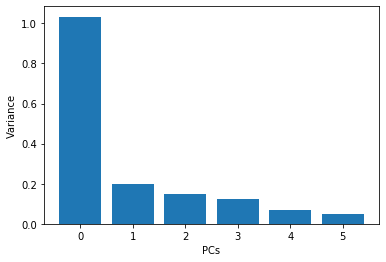

In [26]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [27]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,-1.091573,0.892767,0.447265,-0.317463,-0.429989,-0.455632
1,-0.789000,0.879001,0.691279,-0.579230,0.280799,-0.223511
2,-1.063215,0.876536,0.429775,-0.317455,-0.138696,-0.262386
3,0.860352,0.759775,0.172704,0.630994,-0.163887,-0.109175
4,0.850008,0.758528,0.012778,0.262695,-0.240031,-0.098628
...,...,...,...,...,...,...
53707,1.158017,-0.662725,0.272761,0.053277,0.161937,-0.149331
53708,1.172611,-0.676352,0.053091,-0.042011,0.195702,-0.154772
53709,1.187205,-0.689979,-0.166580,-0.137299,0.229467,-0.160212
53710,-0.606603,-0.557933,0.735917,-0.566490,0.249845,-0.180650


In [28]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,-1.091573,0.892767,0.447265,-0.317463,-0.429989,-0.455632,0
1,-0.789000,0.879001,0.691279,-0.579230,0.280799,-0.223511,0
2,-1.063215,0.876536,0.429775,-0.317455,-0.138696,-0.262386,0
3,0.860352,0.759775,0.172704,0.630994,-0.163887,-0.109175,0
4,0.850008,0.758528,0.012778,0.262695,-0.240031,-0.098628,0
...,...,...,...,...,...,...,...
53707,1.158017,-0.662725,0.272761,0.053277,0.161937,-0.149331,1
53708,1.172611,-0.676352,0.053091,-0.042011,0.195702,-0.154772,1
53709,1.187205,-0.689979,-0.166580,-0.137299,0.229467,-0.160212,1
53710,-0.606603,-0.557933,0.735917,-0.566490,0.249845,-0.180650,1


In [29]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,4.974654e-15,-3.332600e-15,5.124022e-15,-1.628350e-14,-4.234887e-15,-0.004721
1,4.974654e-15,1.000000e+00,-8.961900e-17,4.063017e-16,5.039330e-16,6.793901e-17,-0.052074
2,-3.332600e-15,-8.961900e-17,1.000000e+00,1.221508e-15,-2.687821e-15,-2.187354e-15,0.001162
3,5.124022e-15,4.063017e-16,1.221508e-15,1.000000e+00,2.048147e-15,2.413314e-15,0.000567
4,-1.628350e-14,5.039330e-16,-2.687821e-15,2.048147e-15,1.000000e+00,-5.588047e-15,-0.005044
5,-4.234887e-15,6.793901e-17,-2.187354e-15,2.413314e-15,-5.588047e-15,1.000000e+00,0.018418
target,-4.721304e-03,-5.207362e-02,1.162128e-03,5.671092e-04,-5.043504e-03,1.841817e-02,1.000000


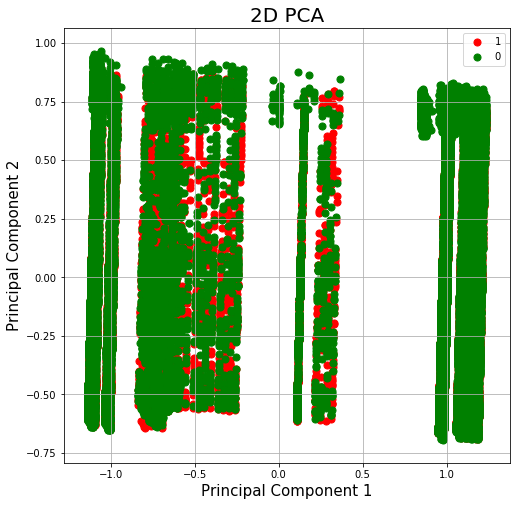

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,0,3,0,0,3,2,8,1,1,29,13,3,1,53,59,8,8,0
1,2,0,1,0,3,2,8,29,13,30,14,23,1,50,59,7,8,0
2,0,2,2,0,3,2,8,30,14,29,13,66,1,40,59,6,8,0
3,3,2,3,0,0,4,16,30,14,1,1,66,1,39,59,5,8,0
4,3,2,3,1,1,4,16,30,14,1,1,66,1,38,59,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53707,4,0,3,1,1,4,19,29,13,0,0,3251494,10027,1,42,1,1,1
53708,4,0,3,2,1,4,19,29,13,0,0,3251494,10027,27,27,1,1,1
53709,4,0,3,3,1,4,19,29,13,0,0,3251494,10027,26,27,1,1,1
53710,2,0,2,0,3,2,11,29,13,27,11,3251494,10027,25,27,1,1,1


In [32]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [33]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [34]:
seed = 7
np.random.seed(seed)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [36]:
model = Sequential()

In [37]:
n_cols = train_X.shape[1]
n_cols

13

In [38]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [40]:
model.fit(x_train, y_train, epochs=50, validation_split=0.4)

Train on 21914 samples, validate on 14610 samples
Epoch 1/50
21914/21914 [==============================] - 3s 127us/step - loss: 0.2499 - accuracy: 0.5037 - val_loss: 0.2495 - val_accuracy: 0.5218
Epoch 2/50
21914/21914 [==============================] - 2s 93us/step - loss: 0.2497 - accuracy: 0.5101 - val_loss: 0.2493 - val_accuracy: 0.5287
Epoch 3/50
21914/21914 [==============================] - 2s 91us/step - loss: 0.2495 - accuracy: 0.5158 - val_loss: 0.2490 - val_accuracy: 0.5359
Epoch 4/50
21914/21914 [==============================] - 2s 89us/step - loss: 0.2492 - accuracy: 0.5200 - val_loss: 0.2485 - val_accuracy: 0.5694
Epoch 5/50
21914/21914 [==============================] - 2s 90us/step - loss: 0.2486 - accuracy: 0.5512 - val_loss: 0.2477 - val_accuracy: 0.5745
Epoch 6/50
21914/21914 [==============================] - 1s 66us/step - loss: 0.2481 - accuracy: 0.5559 - val_loss: 0.2470 - val_accuracy: 0.5840
Epoch 7/50
21914/21914 [==============================] - 2s 80us/s

In [44]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [45]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.31%


In [46]:
dff = pd.read_csv('wat-r6-pkt.csv',nrows=500)

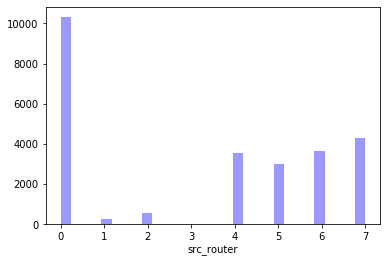

In [47]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

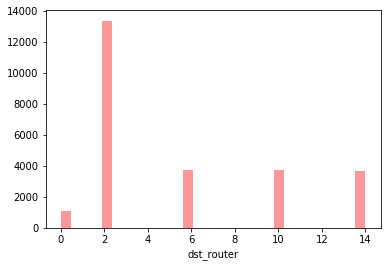

In [48]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

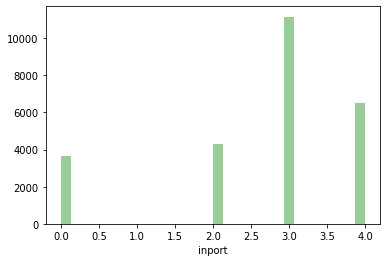

In [49]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

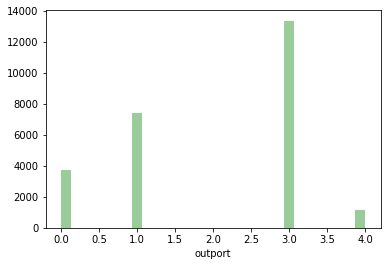

In [50]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

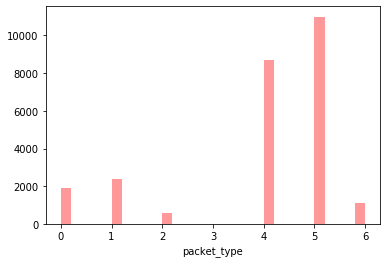

In [51]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')